In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Use V-magnitudes

These runs use examples from TriviaQA with **Wikipedia** contexts of length 4000-8000 characters.

## Results

In [3]:
df = pd.read_json("./results/triviaqa_wiki_use_v_mag.jsonl", lines=True)

In [4]:
df

,model,acc,k,use_v_mag,add_avg,open_book,_duration
0,pythia-70m,0.0025,8,False,False,True,64.064362
1,pythia-70m,0.0025,8,True,False,True,55.489895
2,pythia-70m,0.0050,16,False,False,True,55.984776
3,pythia-70m,0.0050,16,True,False,True,54.856807
4,pythia-70m,0.0050,32,False,False,True,56.609716
5,pythia-70m,0.0050,32,True,False,True,53.436790
6,pythia-70m,0.0075,64,False,False,True,56.361040
7,pythia-70m,0.0050,64,True,False,True,56.181857
8,pythia-70m,0.0050,128,False,False,True,52.216268
9,pythia-70m,0.0050,128,True,False,True,57.826051


In [5]:
# Filter out the smaller models
models_to_plot = ["pythia-410m", "pythia-1b", "pythia-1.4b", "pythia-2.8b"]
df = df.loc[df["model"].isin(models_to_plot)]

In [7]:
df_b = pd.read_json("./results/triviaqa_wiki_baseline.jsonl", lines=True)
df_b = df_b.loc[df_b["model"].isin(models_to_plot)]

In [8]:
model_grouped = df.groupby("model", sort=False)

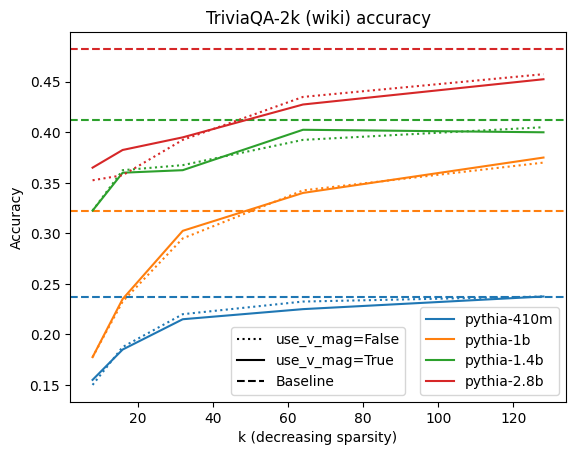

In [16]:
fig, axes = plt.subplots()
linestyles = {False: ":", True: "-"}
models = []
for i, (model, group) in enumerate(model_grouped):
    models.append(model)
    col = f"C{i}"
    
    # Plot dense baseline
    y = df_b.loc[(df_b["model"] == model) & (df_b['open_book'] == True), "acc"].values[0]
    plt.axhline(y = y, color = col, linestyle="--")
    
    v_mag_grouped = group.groupby("use_v_mag")
    for use_v_mag, group in v_mag_grouped:
        axes.plot(group["k"], group["acc"], label=f"{model}, use_v_mag={use_v_mag}", color=col, linestyle=linestyles[use_v_mag])
lines = axes.get_lines()[2::3]

# Dummy lines
dummy_lines = []
dummy_labels = []
for k, v in linestyles.items():
    dummy_lines.append(axes.plot([],[], c="black", linestyle=v)[0])
    dummy_labels.append(f"use_v_mag={k}")
# Add baseline line
dummy_lines.append(axes.plot([],[], c="black", linestyle="--")[0])
dummy_labels.append("Baseline")

legend1 = axes.legend(lines, models, loc="lower right")
legend2 = axes.legend(dummy_lines, dummy_labels, loc="lower center")
axes.add_artist(legend1)
plt.xlabel("k (decreasing sparsity)")
plt.ylabel("Accuracy")
plt.title("TriviaQA-2k (wiki) accuracy")
plt.show()